Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ recipes      1.1.0
✔ dials        1.3.0     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 5, 10, 10, 1, 3, 8, 1, 13, 5, 6, 10, 7, 7,…
$ Glucose                  <dbl> 89, 116, 115, 139, 103, 126, 99, 97, 145, 117…
$ BloodPressure            <dbl> 66, 74, 0, 80, 30, 88, 84, 66, 82, 92, 92, 78…
$ SkinThickness            <dbl> 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 0, 31, 0, …
$ Insulin                  <dbl> 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0, 0, 0…
$ BMI                      <dbl> 28.1, 25.6, 35.3, 27.1, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.201, 0.134, 1.441, 0.183, 0.704, 0.3…
$ Age                      <dbl> 21, 30, 29, 57, 33, 27, 50, 22, 57, 38, 28, 4…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:** The variable *Outcome* is suitable to act as the "outcome" in a logistic regression model. This variable is binary (either you have diabetes or you do not) with the ony two values being 1 and 0, this makes it suited for logistic regression. It is hard to tell if this variable is binary with only looking at the glimpse of the diabetes_train table, so I had to take a look at the whole table to get a better understanding.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test. |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

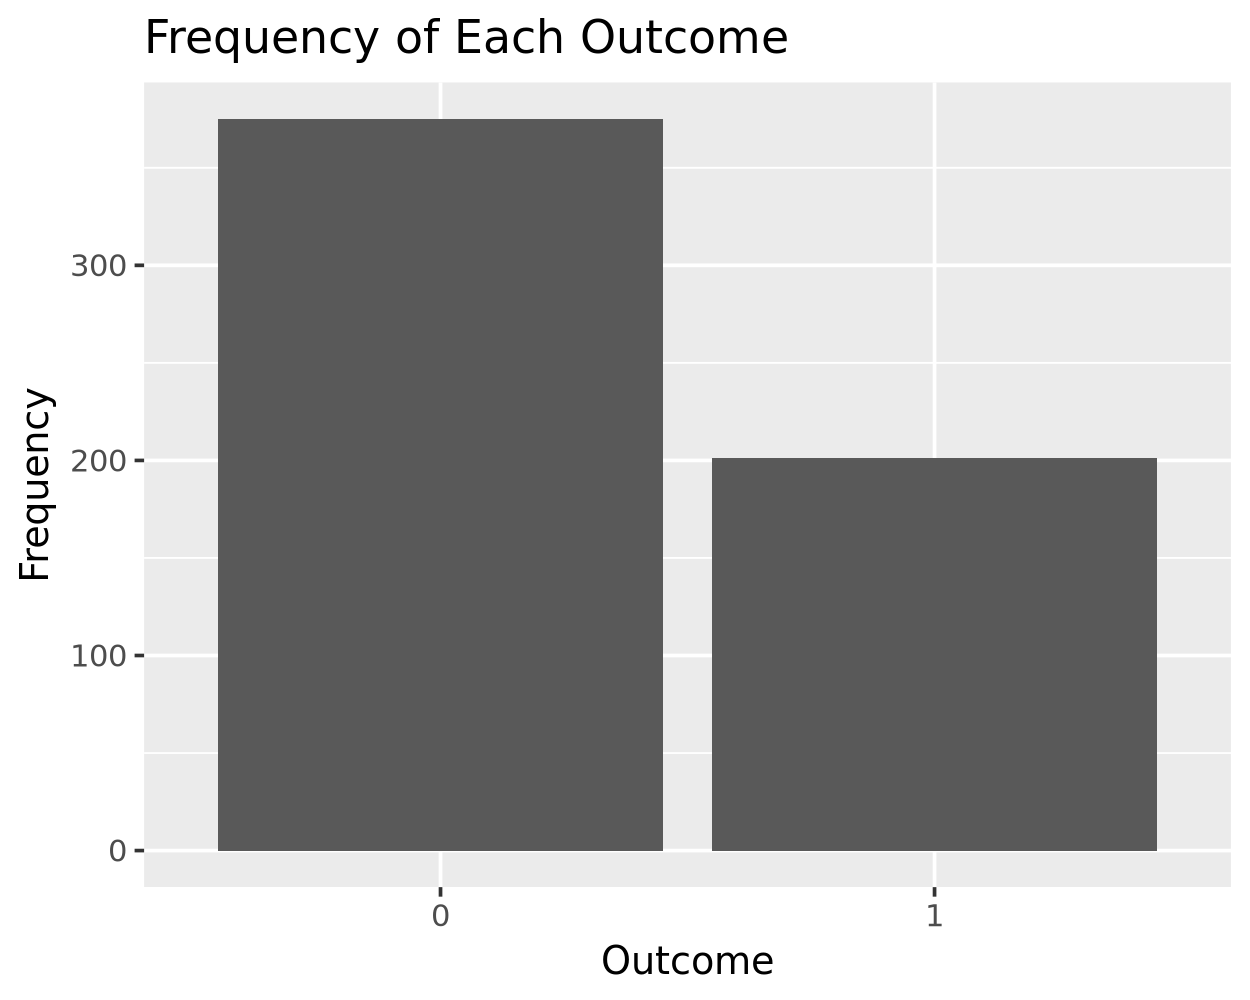

In [4]:
ggplot(diabetes_train, aes(x = Outcome)) +
geom_bar() +
labs(x = "Outcome", y = "Counts", title = "Frequency of Each Outcome")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:** The data is not balanced (there are not equal counts of each outcome), there are almost two times as many people without diabetes than people with diabetes. 

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6
0,Glucose,115.0
0,BMI,35.3


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

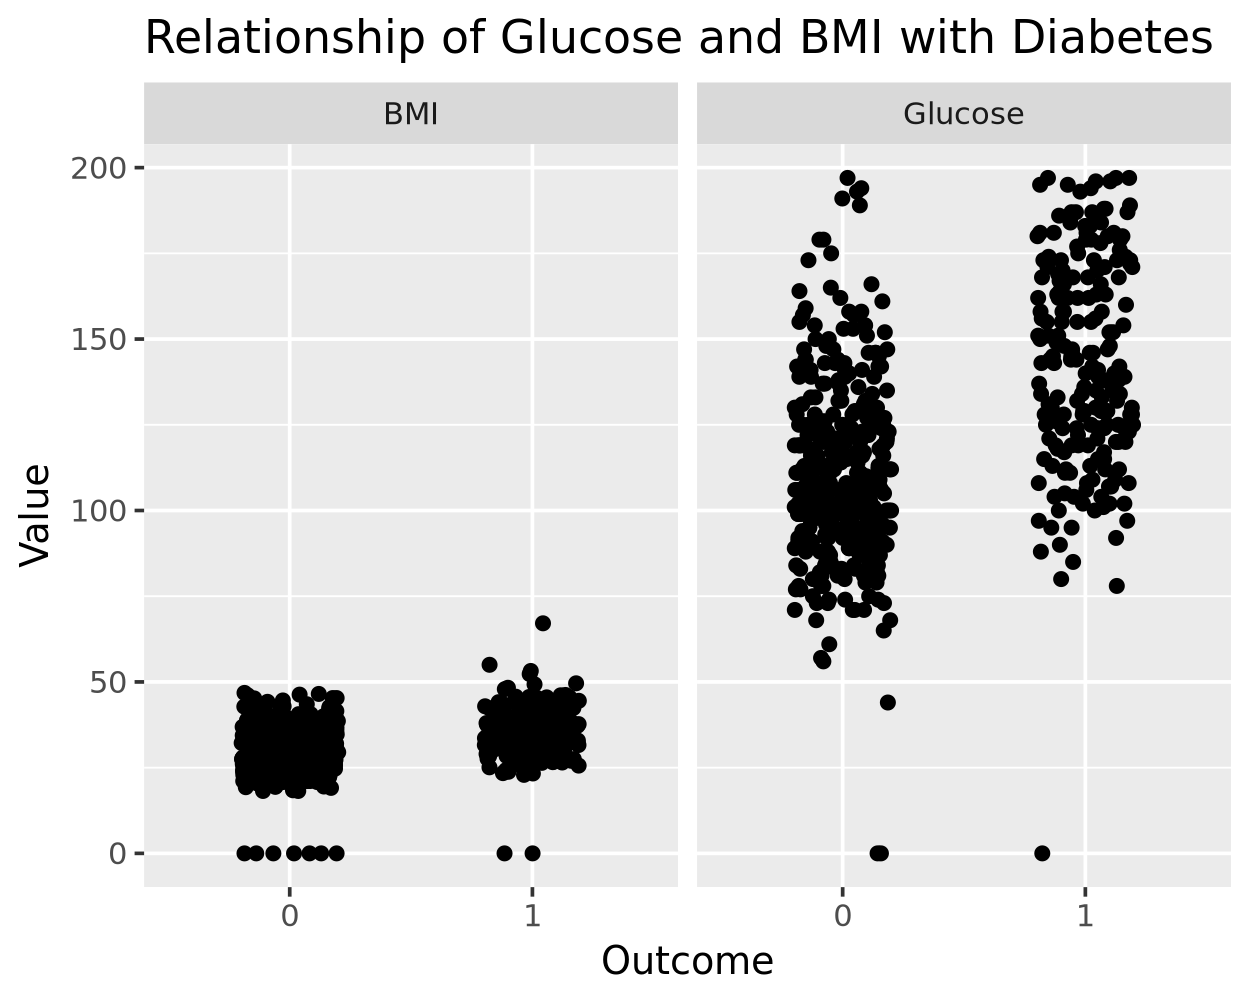

In [6]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
geom_jitter(width = 0.2, height = 0) +
facet_wrap(~name, ncol = 2, scales = 'free_x') +
labs(x = "Outcome", y = "Value", title = "Relationship of Glucose and BMI with Diabetes")

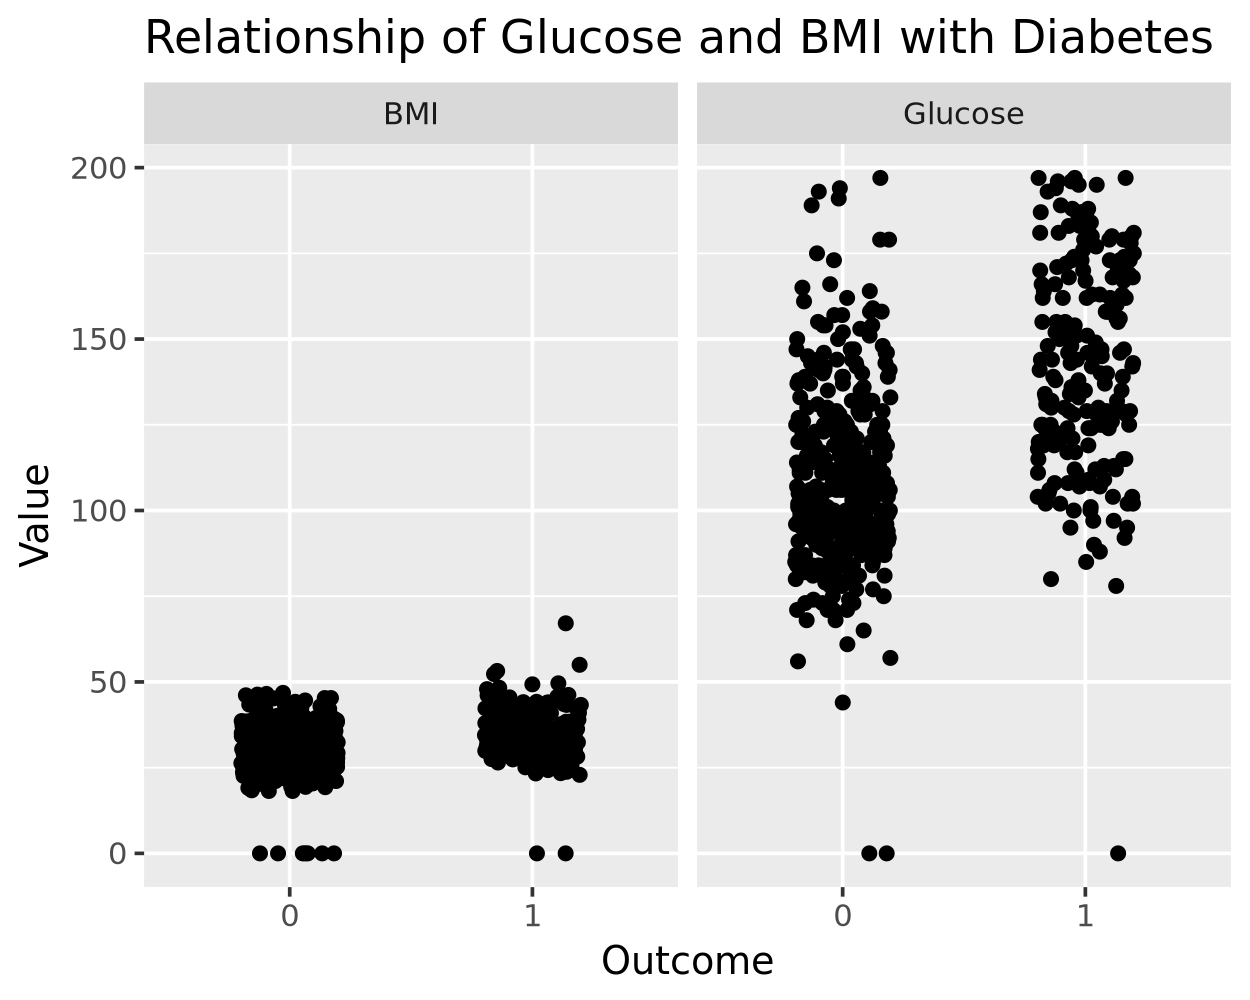

In [7]:
ggplot(plot_df, aes(x = Outcome, y = value)) +
geom_jitter(width = 0.2, height = 0) +
facet_wrap(~name, ncol = 2) +
labs(x = "Outcome", y = "Value", title = "Relationship of Glucose and BMI with Diabetes")

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:** According to documentation when you remove the 'scales = 'free_x'' from the 'facet_wrap' function, it defaults to 'fixed' so the x-axis will share the same scaling. With 'scales = 'free_x'' each variable (BMI, Glucose) is plotted based on their own x-axis scaling. I personally only very slight differences in the plot based on our data so I had to reference the documentation.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [8]:
mod = logistic_reg() |> set_engine('glm')

mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.83336848,0.709086206,-11.047131,2.263318e-28
BMI,0.08002973,0.015729298,5.087940,3.619735e-07
Glucose,0.03669850,0.003830479,9.580658,9.642900e-22


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [9]:
diabetes_test_wPred <- augment(mod_fit, new_data = diabetes_test)

head(diabetes_test_wPred)

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9299033,0.0700967,1,85,66,29,0,26.6,0.351,31,0
0,0.6872761,0.3127239,4,110,92,0,0,37.6,0.191,30,0
1,0.1807101,0.8192899,1,189,60,23,846,30.1,0.398,59,1
0,0.8535383,0.1464617,7,100,0,0,0,30.0,0.484,32,1
1,0.4594849,0.5405151,0,118,84,47,230,45.8,0.551,31,1
0,0.8231372,0.1768628,7,107,74,0,0,29.6,0.254,31,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [10]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 112  33
         1  13  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- There are 67 individuals with diabetes in the diabetes_test table. To get this number you look at the actual/truth column where it says 1 and get the sum of that column.

- Of the 67 individuals that had diabetes in the diabetes_test table, 28 were predicted to have diabetes from the logistic regression model. To get this we are looking where the truth/actual column says 1 and the prediction row says 1.

- Of the 39 individuals that the logistic regression model predicted to have diabetes, 11 did not actually have diabetes. To get this we are looking where the prediction row says 1 and the truth/actual column says 0.
